# Analyzing the downloaded data

## Assumptions

You have used the `download_stenos.py` and `generate_pandas.py` to download the steno protocols and save them into a compressed pickle.

I have them under ./kk/ folder, you will have to adjust the paths accordingly to your storage location.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]

df2017 = pd.read_pickle('./kk/psp2017.pkl.xz', compression='xz')
df2013 = pd.read_pickle('./kk/psp2013_2017.pkl.xz', compression='xz')

We have loaded all the stenos and metadata from the sessions between 2013-2017 in the df2013 data frame and the protocols from 2017 into df2017, the data frames have the following columns.

For 2013-2017 we have 29067 files 

In [2]:
print("2017-2017")
print("\tTotal files:  {}".format(df2013["tokens"].count()))
print("\tTotal tokens: {}".format(df2013["tokens"].sum()))


print("2017-")
print("\tTotal files:  {}".format(df2017["tokens"].count()))
print("\tTotal tokens: {}".format(df2017["tokens"].sum()))

2017-2017
	Total files:  29067
	Total tokens: 5549825
2017-
	Total files:  10486
	Total tokens: 2072892


We can see who are the people that have more tokens, for that we will group the data frame by `name` and sum the tokens. Finally we can take the 20 largest.

In [3]:
top_n = 20
g_name_2013 = df2013.groupby(["name"])
print("Total number of different speakers: {}\n".format(len(g_name_2013)))
print("Top {} speakers by number of tokens for 2013-2017".format(top_n))
g_name_2013["tokens"].sum().nlargest(top_n)

Total number of different speakers: 300

Top 20 speakers by number of tokens for 2013-2017


name
Poslanec_Zbyněk_Stanjura                                 383685
Předseda_vlády_ČR_Bohuslav_Sobotka                       267594
Poslanec_Miroslav_Kalousek                               185406
Poslanec_Petr_Bendl                                      134751
Poslanec_František_Laudát                                112130
Místopředseda_vlády_ČR_a_ministr_financí_Andrej_Babiš    108226
Poslanec_Martin_Kolovratník                              105577
Poslanec_Ludvík_Hovorka                                   94987
Místopředseda_PSP_Vojtěch_Filip                           86079
Poslanec_Michal_Kučera                                    83560
Poslanec_Tomio_Okamura                                    81233
Ministr_zahraničních_věcí_ČR_Lubomír_Zaorálek             80813
Ministr_vnitra_ČR_Milan_Chovanec                          77247
Ministr_životního_prostředí_ČR_Richard_Brabec             75411
Poslanec_Karel_Fiedler                                    75148
Poslankyně_Jana_Černochová         

In [4]:
top_n = 20
g_name_2017 = df2017.groupby(["name"])
print("Total number of different speakers: {}\n".format(len(g_name_2017)))

print("Top {} speakers by number of tokens for 2017".format(top_n))
print(g_name_2017["tokens"].sum().nlargest(top_n))



Total number of different speakers: 270

Top 20 speakers by number of tokens for 2017
name
Poslanec_Zbyněk_Stanjura                   108037
Předseda_vlády_ČR_Andrej_Babiš              65221
Poslanec_Martin_Kolovratník                 63619
Poslanec_Jakub_Michálek                     56038
Poslanec_Miroslav_Kalousek                  48733
Ministryně_financí_ČR_Alena_Schillerová     48348
Ministr_zdravotnictví_ČR_Adam_Vojtěch       41818
Poslanec_Marek_Benda                        39580
Poslanec_Vojtěch_Munzar                     38385
Poslanec_Mikuláš_Ferjenčík                  36719
Místopředseda_PSP_Tomio_Okamura             35933
Poslanec_Jan_Skopeček                       32153
Poslanec_Marian_Jurečka                     29294
Poslanec_Ivan_Adamec                        29073
Poslanec_Marek_Výborný                      28069
Poslanec_Leo_Luzar                          27373
Poslanec_Vít_Kaňkovský                      27150
Poslankyně_Markéta_Pekarová_Adamová         26956
Ministr_d

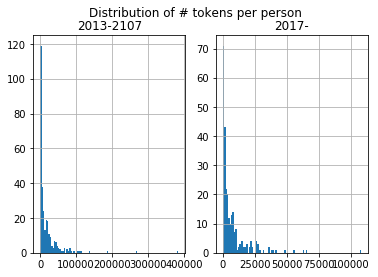

In [5]:
plt.suptitle("Distribution of # tokens per person")
ax1=plt.subplot(121)
df2013.groupby(["name"])["tokens"].sum().hist(bins=100, ax=ax1)
plt.title("2013-2107")
ax1=plt.subplot(122)
df2017.groupby(["name"])["tokens"].sum().hist(bins=100, ax=ax1)
_ = plt.title("2017-")
